<a href="https://colab.research.google.com/github/mohamedb93/Predictive_Analysis_Data_2024/blob/main/3_Saving_and_Loading_a_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Saving and Loading a Keras Neural Network

Complex neural networks will take a long time to fit/train.  It is helpful to be able to save these neural networks so that you can reload them later.  A reloaded neural network will not require retraining.  Keras provides three formats for neural network saving.

* **JSON** - Stores the neural network structure (no weights) in the [JSON file format](https://en.wikipedia.org/wiki/JSON).
* **HDF5** - Stores the complete neural network (with weights) in the [HDF5 file format](https://en.wikipedia.org/wiki/Hierarchical_Data_Format). Do not confuse HDF5 with [HDFS](https://en.wikipedia.org/wiki/Apache_Hadoop).  They are different.  We do not use HDFS in this class.

Usually, you will want to save in HDF5.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import pandas as pd
import io
import os
import requests
import numpy as np
from sklearn import metrics

In [ ]:
save_path = "."

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/glopez21/Deep-Learning-Intro/main/data/auto-mpg.csv', na_values=['NA', '?'])

In [ ]:
cars = df['name']

In [ ]:
# Handle missing value
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

In [ ]:
# Pandas to Numpy
x = df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']].values
y = df['mpg'].values

In [ ]:
# Build the neural network
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(10, activation='relu')) # Hidden 2
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x,y,verbose=2,epochs=100)

Epoch 1/100
13/13 - 1s - loss: 1048702.2500 - 691ms/epoch - 53ms/step
Epoch 2/100
13/13 - 0s - loss: 635544.3750 - 31ms/epoch - 2ms/step
Epoch 3/100
13/13 - 0s - loss: 414068.1562 - 30ms/epoch - 2ms/step
Epoch 4/100
13/13 - 0s - loss: 273995.1250 - 29ms/epoch - 2ms/step
Epoch 5/100
13/13 - 0s - loss: 181305.4062 - 29ms/epoch - 2ms/step
Epoch 6/100
13/13 - 0s - loss: 118894.3047 - 28ms/epoch - 2ms/step
Epoch 7/100
13/13 - 0s - loss: 76319.8594 - 26ms/epoch - 2ms/step
Epoch 8/100
13/13 - 0s - loss: 48713.5234 - 25ms/epoch - 2ms/step
Epoch 9/100
13/13 - 0s - loss: 30055.0996 - 28ms/epoch - 2ms/step
Epoch 10/100
13/13 - 0s - loss: 18906.6777 - 28ms/epoch - 2ms/step
Epoch 11/100
13/13 - 0s - loss: 15035.2148 - 28ms/epoch - 2ms/step
Epoch 12/100
13/13 - 0s - loss: 12627.1406 - 33ms/epoch - 3ms/step
Epoch 13/100
13/13 - 0s - loss: 10586.3057 - 26ms/epoch - 2ms/step
Epoch 14/100
13/13 - 0s - loss: 8825.7012 - 26ms/epoch - 2ms/step
Epoch 15/100
13/13 - 0s - loss: 7334.4297 - 27ms/epoch - 2ms/st

In [ ]:
# Predict
pred = model.predict(x)

13/13 [==============================] - 0s 2ms/step


In [ ]:
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y))
print(f"Before save score (RMSE): {score}")

Before save score (RMSE): 24.538941744000518


In [ ]:
# save neural network structure to JSON (no weights)
model_json = model.to_json()
with open(os.path.join(save_path,"network.json"), "w") as json_file:
    json_file.write(model_json)

In [ ]:
# save entire network to HDF5 (save everything, suggested)
model.save(os.path.join(save_path,"network.h5"))

The code below sets up a neural network and reads the data (for predictions), but it does not clear the model directory or fit the neural network. The code loads the weights from the previous fit. Now we reload the network and perform another prediction. The RMSE should match the previous one exactly if we saved and reloaded the neural network correctly.

In [ ]:
from tensorflow.keras.models import load_model
model2 = load_model(os.path.join(save_path,"network.h5"))
pred = model2.predict(x)
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y))
print(f"After load score (RMSE): {score}")

13/13 [==============================] - 0s 2ms/step
After load score (RMSE): 24.538941744000518


In [ ]:
# !pip install ann_visualizer
# !pip install graphviz

In [ ]:
from ann_visualizer.visualize import ann_viz;

ann_viz(model, title="My first neural network")

In [ ]:
from tensorflow.keras.utils import plot_model

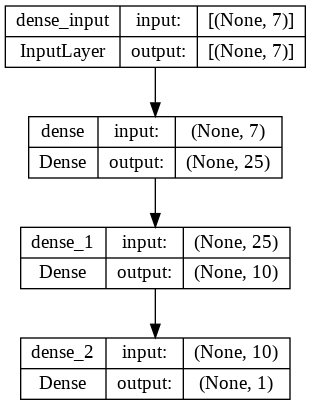

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
#  !pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 5.0 MB/s 


In [ ]:
import visualkeras
visualkeras.layered_view(model)